<a href="https://colab.research.google.com/github/channingpitts/DS-2002/blob/main/FinalNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Summary**

**Data**

In [ ]:
# Importing necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

In [ ]:
# Load DataFrame
df = pd.read_csv('/content/df_cleaned.csv')

In [ ]:
# Looking at variables of interest
df.head()

,RELIG,CHILDS,AGEKDBRN,EDUC,HAPPY,ATTEND,GOD,INCOME16,FAMGEN,RELIG16,RELITEN,DEGREE,AGE,SEX,RACE,MARITAL,POLVIEWS,HRS1
0,CHRISTIAN,0.0,NaN,14.0,2.0,2-3 times a month,6.0,NaN,1.0,PROTESTANT,Strong,Associate/junior college,43.0,1.0,1.0,5.0,6.0,NaN
1,CATHOLIC,3.0,21.0,10.0,1.0,About once or twice a year,6.0,16.0,2.0,CATHOLIC,Strong,High school,74.0,2.0,1.0,4.0,NaN,NaN
2,NONE,2.0,35.0,16.0,1.0,About once or twice a year,5.0,25.0,2.0,CATHOLIC,No religion,Bachelor's,42.0,1.0,1.0,1.0,5.0,40.0
3,PROTESTANT,2.0,32.0,16.0,1.0,Nearly every week,6.0,26.0,1.0,CATHOLIC,Strong,Bachelor's,63.0,2.0,1.0,1.0,4.0,40.0
4,CATHOLIC,0.0,NaN,18.0,2.0,Several times a week,6.0,26.0,1.0,CATHOLIC,Strong,Graduate,71.0,1.0,2.0,3.0,7.0,NaN


Age and Number of Children

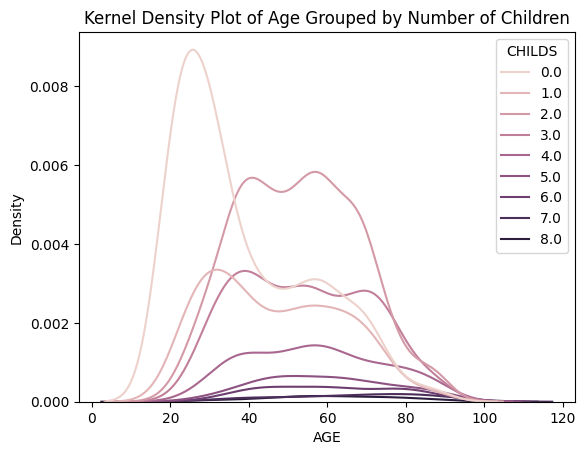

In [ ]:
# Kernel Density Plot of 'AGE' by 'CHILDS'
sns.kdeplot(data=df, x='AGE', hue='CHILDS')
plt.title('Kernel Density Plot of Age Grouped by Number of Children')
plt.show()

Age at Birth of First Child compared by Number of Children

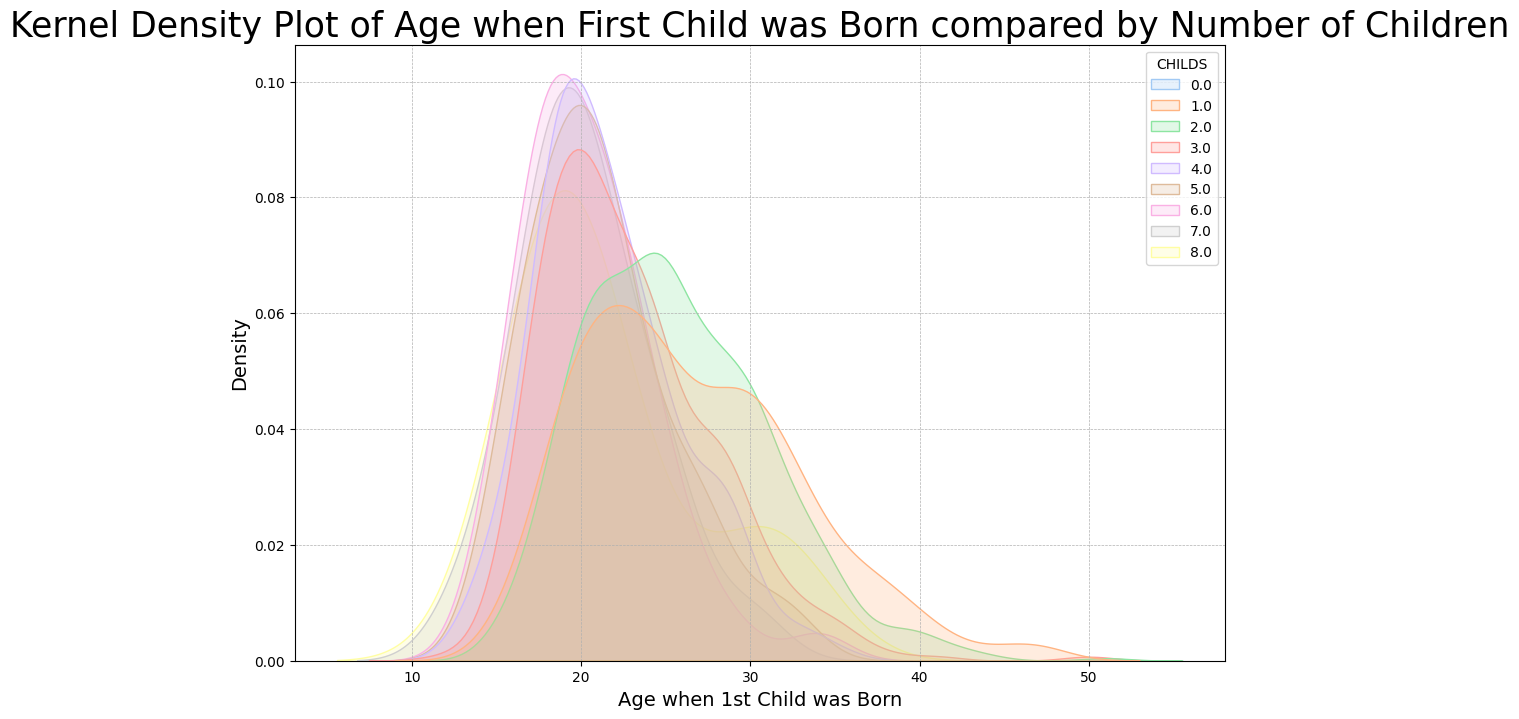

In [ ]:
# Create the figure
plt.figure(figsize=(12, 8))

# Create the grouped Kernel Density Plot with fill and custom palette
sns.kdeplot(data=df, x='AGEKDBRN', hue='CHILDS', common_norm=False, fill=True, palette="pastel")

# Adding Annotations for minimum and maximum education levels
min_val = df['AGEKDBRN'].min()
max_val = df['AGEKDBRN'].max()

# Adding gridlines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adding Labels and Titles
plt.title('Kernel Density Plot of Age when First Child was Born compared by Number of Children', fontsize=25)
plt.xlabel('Age when 1st Child was Born', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Show the plot
plt.show()

Age and General Happiness

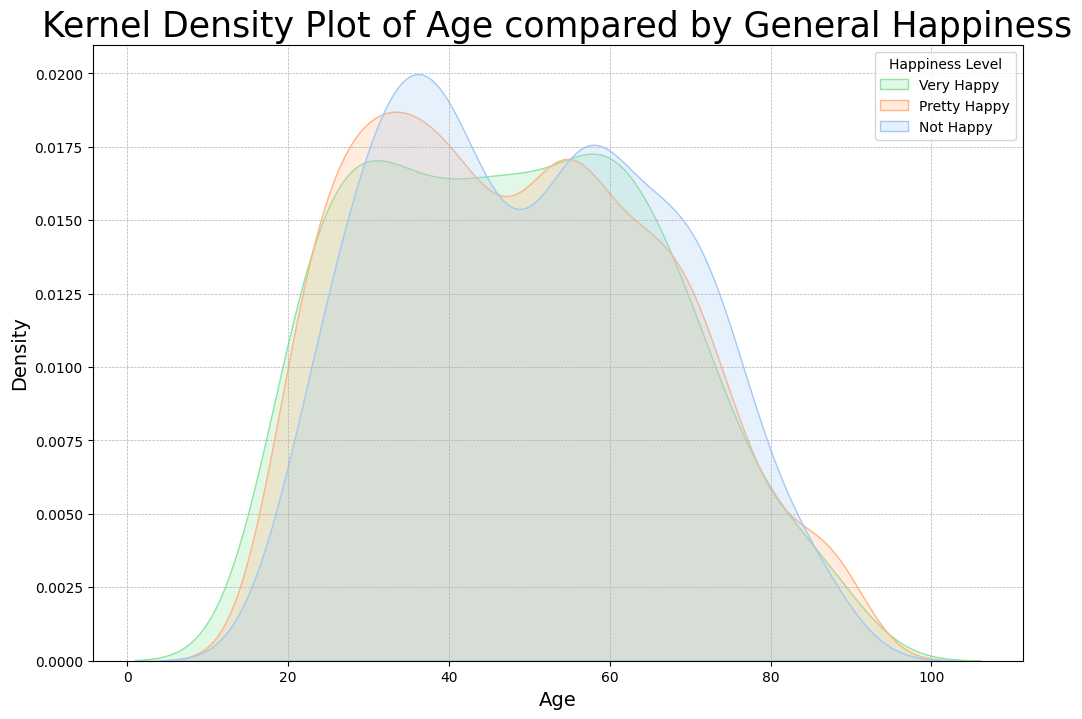

In [ ]:
# Create the figure
plt.figure(figsize=(12, 8))

# Create the grouped Kernel Density Plot with fill and custom palette
sns.kdeplot(data=df, x='AGE', hue='HAPPY', common_norm=False, fill=True, palette="pastel")

# Adding Annotations for minimum and maximum education levels
min_val = df['AGE'].min()
max_val = df['AGE'].max()

# Adding gridlines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adding Labels and Titles
plt.title('Kernel Density Plot of Age compared by General Happiness', fontsize=25)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Customize the legend
plt.legend(title='Happiness Level', labels=['Very Happy', 'Pretty Happy', 'Not Happy'])

# Show the plot
plt.show()

**Results**

Religion and Income

In [ ]:
income_stats = df.groupby('RELIG')['INCOME16'].describe()
income_stats

In [ ]:
# SABRINA
income_mapping = {

}

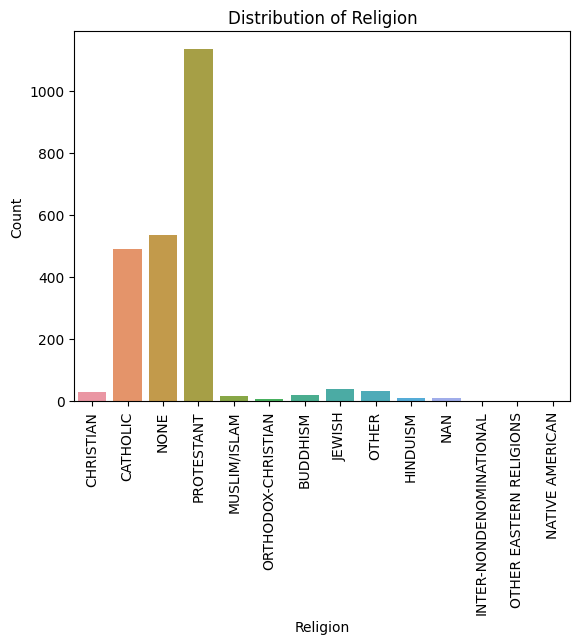

In [ ]:
# Looing at distribution of religion
sns.countplot(x='RELIG', data=df)
plt.xlabel('Religion')
plt.ylabel('Count')
plt.title('Distribution of Religion')
plt.xticks(rotation=90)
plt.show()

NameError: ignored

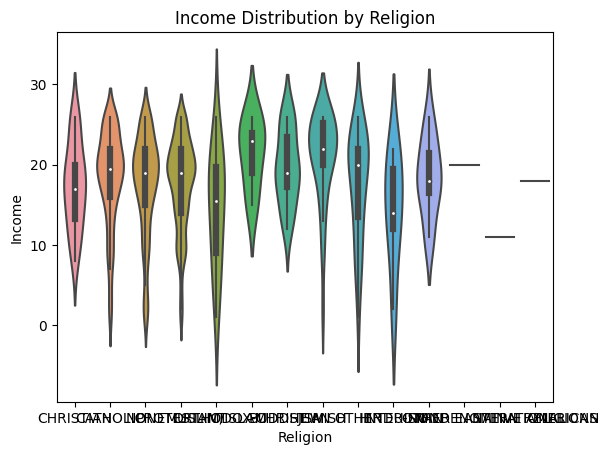

In [ ]:
# Creating a Violin Plot for Income Distribution by Religions
sns.violinplot(x='RELIG', y='INCOME16', data=df)
plt.xlabel('Religion')
plt.ylabel('Income')
plt.title('Income Distribution by Religion')
legend_elements = [Line2D([0], [0], color='white', marker='', markersize=0, label=f"{value}: {label}") for value, label in income_mapping.items()]
plt.legend(handles=legend_elements, title='Income Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

Religion and Family Generations

In [ ]:
income_stats_by_famgen = df.groupby('FAMGEN')['INCOME16'].describe()
income_stats_by_famgen

,count,mean,std,min,25%,50%,75%,max
FAMGEN,,,,,,,,
1.0,1355.0,17.458303,5.959885,1.0,14.0,19.0,22.0,26.0
2.0,679.0,18.366716,5.716210,1.0,16.0,19.0,22.0,26.0
3.0,25.0,18.640000,5.345403,1.0,17.0,19.0,23.0,26.0
4.0,16.0,14.062500,6.747530,1.0,9.5,14.5,20.0,23.0
5.0,47.0,17.638298,7.399840,1.0,13.5,20.0,24.0,26.0
6.0,25.0,18.080000,5.007661,6.0,15.0,20.0,22.0,26.0
7.0,1.0,13.000000,NaN,13.0,13.0,13.0,13.0,13.0


In [ ]:
cross_tab_percentage = pd.crosstab(index=df['FAMGEN'], columns=df['RELIG'], normalize='columns') * 100
cross_tab_percentage

RELIG,BUDDHISM,CATHOLIC,CHRISTIAN,HINDUISM,INTER-NONDENOMINATIONAL,JEWISH,MUSLIM/ISLAM,NAN,NATIVE AMERICAN,NONE,ORTHODOX-CHRISTIAN,OTHER,OTHER EASTERN RELIGIONS,PROTESTANT
FAMGEN,,,,,,,,,,,,,,
1.0,52.631579,56.557377,55.172414,75.0,0.0,79.487179,50.00,54.545455,0.0,63.925234,33.333333,53.125,100.0,64.991182
2.0,47.368421,38.114754,37.931034,12.5,100.0,20.512821,43.75,45.454545,100.0,29.906542,66.666667,43.750,0.0,29.012346
3.0,0.000000,1.229508,0.000000,0.0,0.0,0.000000,6.25,0.000000,0.0,1.682243,0.000000,0.000,0.0,1.234568
4.0,0.000000,0.614754,3.448276,0.0,0.0,0.000000,0.00,0.000000,0.0,0.373832,0.000000,0.000,0.0,1.058201
5.0,0.000000,1.639344,3.448276,0.0,0.0,0.000000,0.00,0.000000,0.0,2.429907,0.000000,3.125,0.0,2.645503
6.0,0.000000,1.844262,0.000000,12.5,0.0,0.000000,0.00,0.000000,0.0,1.682243,0.000000,0.000,0.0,0.970018
7.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00,0.000000,0.0,0.000000,0.000000,0.000,0.0,0.088183


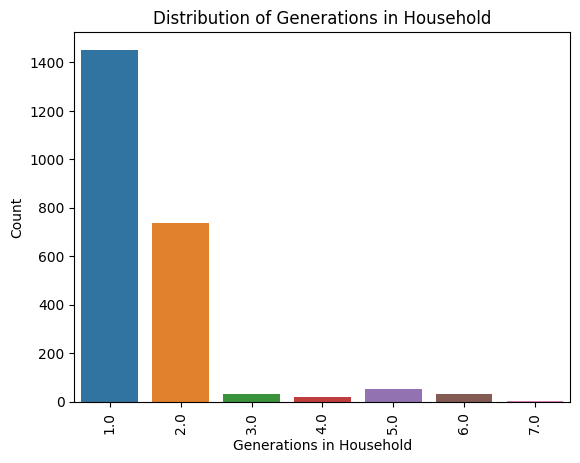

In [ ]:
# Looking at Distribution of Generations in Households
sns.countplot(x='FAMGEN', data=df)
plt.xlabel('Generations in Household')
plt.ylabel('Count')
plt.title('Distribution of Generations in Household')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Adding legend mappings
famgen_legend = {
    1: 'One generation',
    2: 'Two generations, children',
    3: 'Two generations, parents',
    4: 'Two generations, grandchildren',
    5: 'Three generations, grandchildren',
    6: 'Three generations, children, parents',
    7: 'Four generations'
}

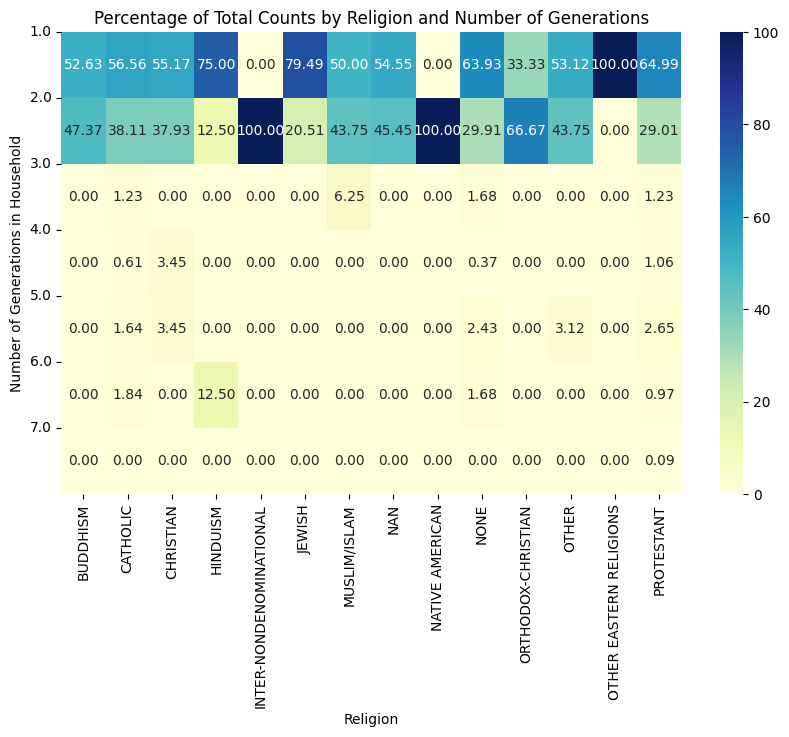

In [ ]:
# Create a heatmap of the cross-tabulation table with percentages
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab_percentage, annot=True, cmap='YlGnBu', cbar=True, fmt=".2f")
plt.xlabel('Religion')
plt.ylabel('Number of Generations in Household')
plt.title('Percentage of Total Counts by Religion and Number of Generations')
# Adjust x-tick positions to align with columns in the heatmap
plt.xticks(ticks=[tick + 0.5 for tick in range(len(cross_tab_percentage.columns))],
           labels=cross_tab_percentage.columns, rotation=90)
plt.yticks(ticks=range(len(cross_tab_percentage.index)), labels=cross_tab_percentage.index, rotation=0)
plt.show()

Religion and Number of Children

In [ ]:
child_stats = df.groupby('RELIG')['CHILDS'].describe()
child_stats

,count,mean,std,min,25%,50%,75%,max
RELIG,,,,,,,,
BUDDHISM,19.0,1.421053,1.677160,0.0,0.00,1.0,2.00,6.0
CATHOLIC,488.0,2.030738,1.700670,0.0,1.00,2.0,3.00,8.0
CHRISTIAN,29.0,1.344828,1.078221,0.0,0.00,1.0,2.00,3.0
HINDUISM,8.0,1.125000,1.726888,0.0,0.00,0.5,1.25,5.0
INTER-NONDENOMINATIONAL,1.0,1.000000,NaN,1.0,1.00,1.0,1.00,1.0
JEWISH,39.0,1.820513,1.847784,0.0,0.00,2.0,2.50,8.0
MUSLIM/ISLAM,16.0,1.812500,1.376893,0.0,0.75,2.0,2.25,5.0
NAN,11.0,3.000000,2.323790,0.0,1.50,3.0,3.50,8.0
NATIVE AMERICAN,1.0,3.000000,NaN,3.0,3.00,3.0,3.00,3.0


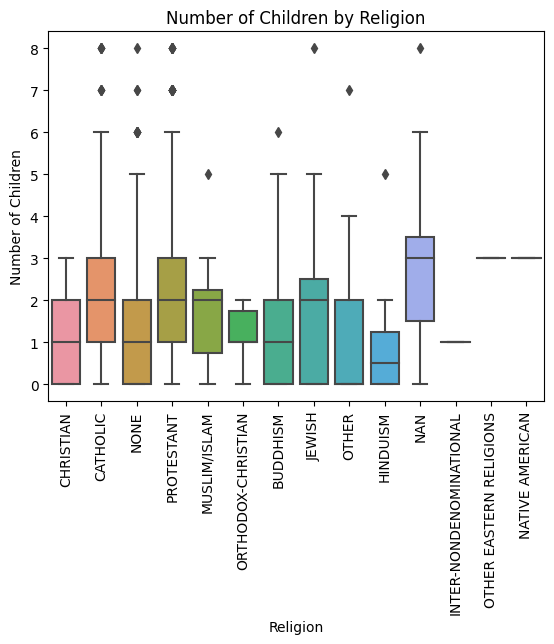

In [ ]:
# Creating a Box Plot for Number of Children by Religion
sns.boxplot(x='RELIG', y='CHILDS', data=df)
plt.xlabel('Religion')
plt.ylabel('Number of Children')
plt.title('Number of Children by Religion')
plt.xticks(rotation=90)
plt.show()

Religion and Age at Birth of First Child

In [ ]:
age_birth_stats = df.groupby('RELIG')['AGEKDBRN'].describe()
age_birth_stats

,count,mean,std,min,25%,50%,75%,max
RELIG,,,,,,,,
BUDDHISM,12.0,24.083333,5.648143,18.0,20.50,23.5,24.25,37.0
CATHOLIC,370.0,24.751351,5.874275,14.0,20.00,24.0,29.00,47.0
CHRISTIAN,21.0,24.333333,5.498485,15.0,21.00,23.0,29.00,34.0
HINDUISM,4.0,27.250000,2.500000,24.0,26.25,27.5,28.50,30.0
INTER-NONDENOMINATIONAL,1.0,24.000000,NaN,24.0,24.00,24.0,24.00,24.0
JEWISH,26.0,27.576923,5.285248,19.0,25.00,26.0,31.25,39.0
MUSLIM/ISLAM,12.0,23.166667,2.443296,18.0,22.00,23.0,25.00,27.0
NAN,10.0,25.300000,6.037844,17.0,22.00,24.0,31.50,33.0
NATIVE AMERICAN,1.0,23.000000,NaN,23.0,23.00,23.0,23.00,23.0


Minimum:  12.0
0th quantile:  12.0
.05 quantile:  17.0
.10 quantile:  18.0
.25 quantile:  20.0
.50 quantile:  23.0
.75 quantile:  28.0
.90 quantile:  32.0
.95 quantile:  35.0
1.00 quantile:  51.0
Sample Maximum: 51.0


<Axes: xlabel='AGEKDBRN'>

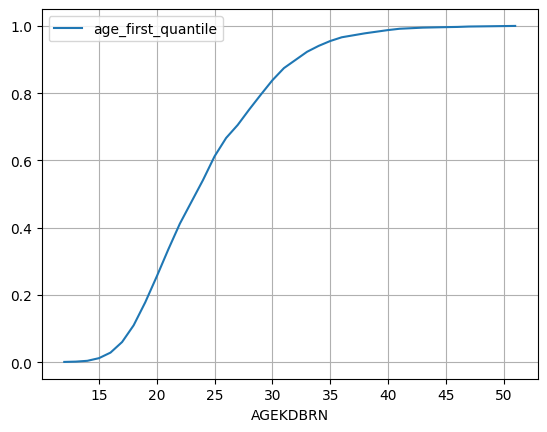

In [ ]:
# Statistics: Measure of Rank
# Sample quantiles for the AGEKDBRN variable:
var = 'AGEKDBRN'
print('Minimum: ', df[var].min())
print('0th quantile: ', df[var].quantile(0))
print('.05 quantile: ', df[var].quantile(.05))
print('.10 quantile: ', df[var].quantile(.10))
print('.25 quantile: ', df[var].quantile(.25))
print('.50 quantile: ',df[var].quantile(.50))
print('.75 quantile: ',df[var].quantile(.75))
print('.90 quantile: ',df[var].quantile(.90))
print('.95 quantile: ',df[var].quantile(.95))
print('1.00 quantile: ',df[var].quantile(1))
print('Sample Maximum:', df[var].max())

# A quick Empirical Distribution Function plot:
df['age_first_quantile'] = df['AGEKDBRN'].rank(method = 'average', pct = True) # Ranks the values
df.sort_values('AGEKDBRN').plot(x = 'AGEKDBRN', y = 'age_first_quantile', grid = True)

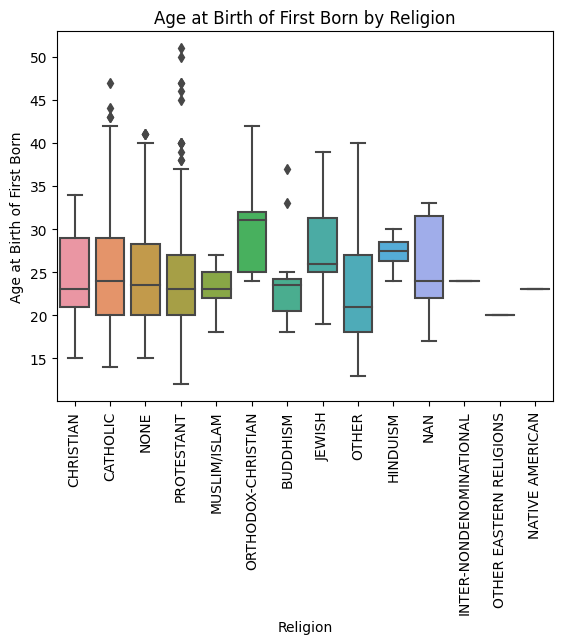

In [ ]:
# Creating a Box Plot for Age at Birth of First Child by Religion
sns.boxplot(x='RELIG', y='AGEKDBRN', data=df)
plt.xlabel('Religion')
plt.ylabel('Age at Birth of First Born')
plt.title('Age at Birth of First Born by Religion')
plt.xticks(rotation=90)
plt.show()

Religion and Education

In [ ]:
educ_stats = df.groupby('RELIG')['EDUC'].describe()
educ_stats

,count,mean,std,min,25%,50%,75%,max
RELIG,,,,,,,,
BUDDHISM,19.0,14.105263,2.183136,11.0,12.50,14.0,15.50,20.0
CATHOLIC,487.0,13.285421,3.317656,0.0,12.00,13.0,16.00,20.0
CHRISTIAN,29.0,14.310345,2.331515,9.0,12.00,14.0,16.00,18.0
HINDUISM,8.0,16.750000,3.494894,11.0,15.00,18.0,19.25,20.0
INTER-NONDENOMINATIONAL,1.0,14.000000,NaN,14.0,14.00,14.0,14.00,14.0
JEWISH,39.0,16.358974,2.719202,12.0,14.00,16.0,18.50,20.0
MUSLIM/ISLAM,16.0,14.562500,2.502499,12.0,12.00,15.0,16.00,20.0
NAN,11.0,13.363636,2.838053,8.0,12.00,14.0,16.00,16.0
NATIVE AMERICAN,1.0,12.000000,NaN,12.0,12.00,12.0,12.00,12.0


Minimum:  0.0
0th quantile:  0.0
.05 quantile:  9.0
.10 quantile:  11.0
.25 quantile:  12.0
.50 quantile:  14.0
.75 quantile:  16.0
.90 quantile:  18.0
.95 quantile:  18.0
1.00 quantile:  20.0
Sample Maximum: 20.0


<Axes: xlabel='EDUC'>

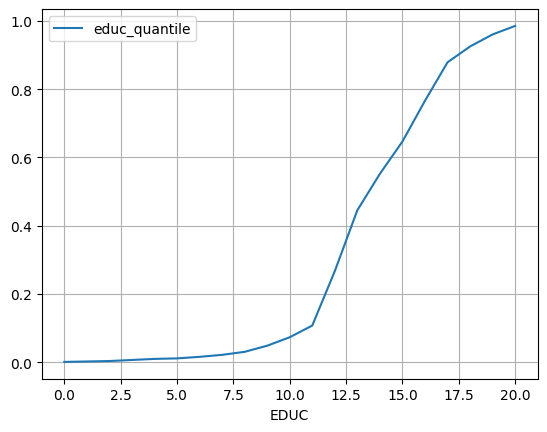

In [ ]:
# Statistics: Measure of Rank
# Sample quantiles for the EDUC variable:
var = 'EDUC'
print('Minimum: ', df[var].min())
print('0th quantile: ', df[var].quantile(0))
print('.05 quantile: ', df[var].quantile(.05))
print('.10 quantile: ', df[var].quantile(.10))
print('.25 quantile: ', df[var].quantile(.25))
print('.50 quantile: ',df[var].quantile(.50))
print('.75 quantile: ',df[var].quantile(.75))
print('.90 quantile: ',df[var].quantile(.90))
print('.95 quantile: ',df[var].quantile(.95))
print('1.00 quantile: ',df[var].quantile(1))
print('Sample Maximum:', df[var].max())

# A quick Empirical Distribution Function plot:
df['educ_quantile'] = df['EDUC'].rank(method = 'average', pct = True) # Ranks the values
df.sort_values('EDUC').plot(x = 'EDUC', y = 'educ_quantile', grid = True)

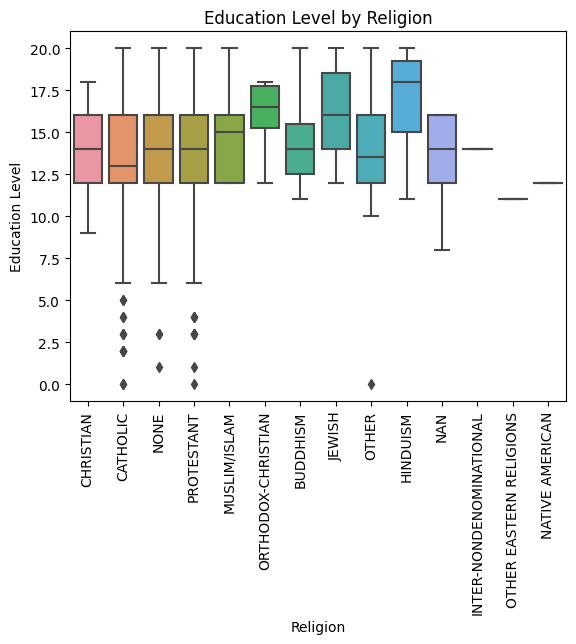

In [ ]:
# Creating a Box Plot of Education Level by Religion
sns.boxplot(x='RELIG', y='EDUC', data=df)
plt.xlabel('Religion')
plt.ylabel('Education Level')
plt.title('Education Level by Religion')
plt.xticks(rotation=90)
plt.show()

Religion and General Happiness

In [ ]:
happy_stats = df.groupby('RELIG')['HAPPY'].describe()
happy_stats

,count,mean,std,min,25%,50%,75%,max
RELIG,,,,,,,,
BUDDHISM,19.0,1.736842,0.653376,1.0,1.00,2.0,2.00,3.0
CATHOLIC,488.0,1.801230,0.653091,1.0,1.00,2.0,2.00,3.0
CHRISTIAN,29.0,1.965517,0.778403,1.0,1.00,2.0,3.00,3.0
HINDUISM,8.0,1.750000,0.707107,1.0,1.00,2.0,2.00,3.0
INTER-NONDENOMINATIONAL,1.0,2.000000,NaN,2.0,2.00,2.0,2.00,2.0
JEWISH,39.0,1.564103,0.552262,1.0,1.00,2.0,2.00,3.0
MUSLIM/ISLAM,16.0,1.875000,0.806226,1.0,1.00,2.0,2.25,3.0
NAN,11.0,1.727273,0.467099,1.0,1.50,2.0,2.00,2.0
NATIVE AMERICAN,1.0,2.000000,NaN,2.0,2.00,2.0,2.00,2.0


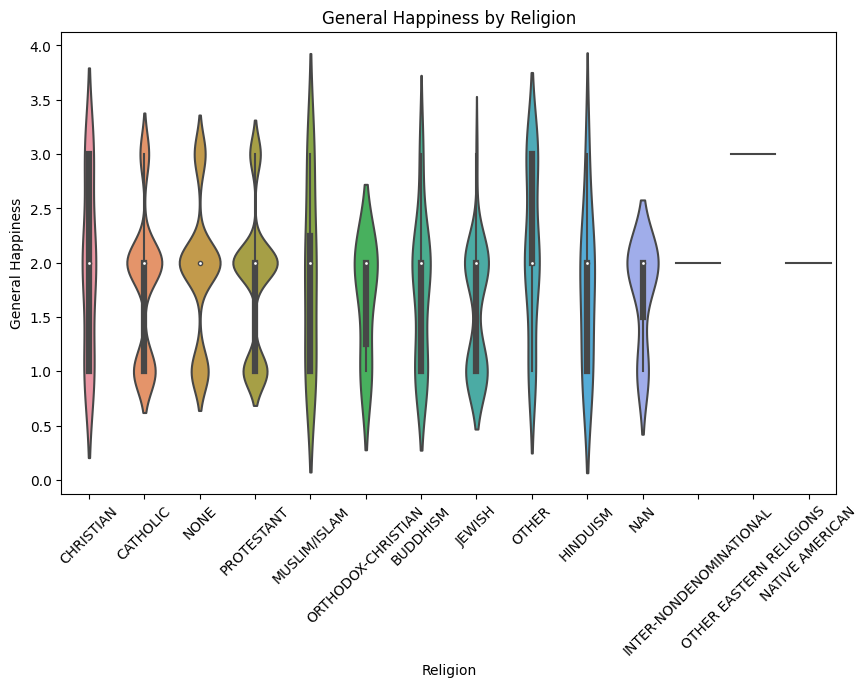

In [ ]:
# Creating a Violin Plot of General Happiness by Religion
plt.figure(figsize=(10, 6))
sns.violinplot(x='RELIG', y='HAPPY', data=df)
plt.xlabel('Religion')
plt.ylabel('General Happiness')
plt.title('General Happiness by Religion')
plt.xticks(rotation=45)
plt.show()

Religion and Belief in God

In [ ]:
god_stats = df.groupby('RELIG')['GOD'].describe()
god_stats

,count,mean,std,min,25%,50%,75%,max
RELIG,,,,,,,,
BUDDHISM,19.0,3.210526,1.583910,1.0,2.00,3.0,4.50,6.0
CATHOLIC,483.0,5.275362,1.068579,1.0,5.00,6.0,6.00,6.0
CHRISTIAN,29.0,5.448276,1.270158,1.0,6.00,6.0,6.00,6.0
HINDUISM,8.0,4.250000,1.908627,2.0,2.75,4.5,6.00,6.0
INTER-NONDENOMINATIONAL,1.0,3.000000,NaN,3.0,3.00,3.0,3.00,3.0
JEWISH,39.0,3.846154,1.843030,1.0,2.00,4.0,6.00,6.0
MUSLIM/ISLAM,16.0,5.937500,0.250000,5.0,6.00,6.0,6.00,6.0
NAN,11.0,5.545455,0.522233,5.0,5.00,6.0,6.00,6.0
NATIVE AMERICAN,1.0,6.000000,NaN,6.0,6.00,6.0,6.00,6.0


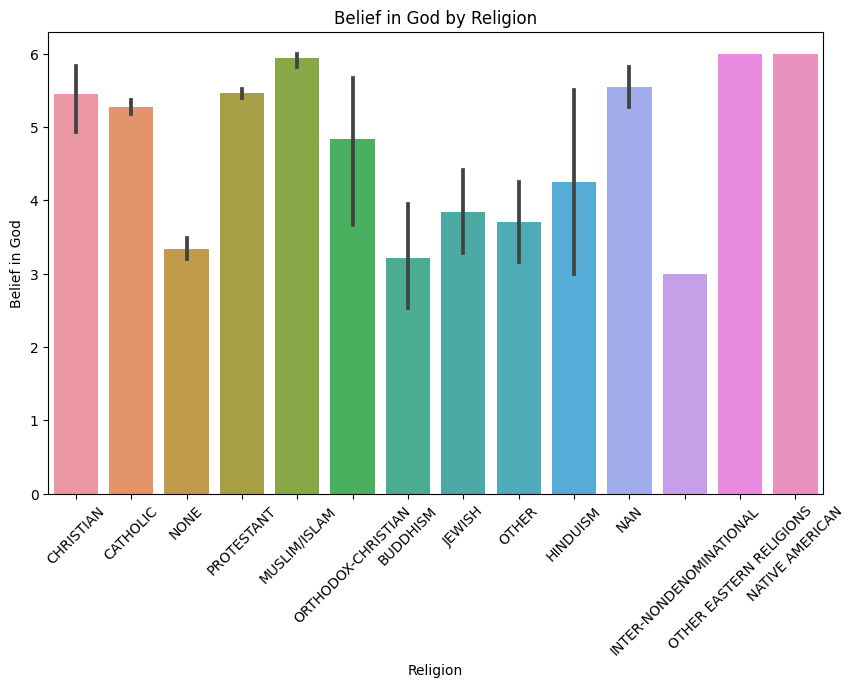

In [ ]:
# Creating a Bar Plot for Belief in God by Religion
plt.figure(figsize=(10, 6))
sns.barplot(x='RELIG', y='GOD', data=df)
plt.xlabel('Religion')
plt.ylabel('Belief in God')
plt.title('Belief in God by Religion')
plt.xticks(rotation=45)
plt.show()

Religion and Religious Service Attendance

In [ ]:
# Create a mapping for the Attendance text values to numerical values on a scale from 0-8, with 0 being never and 8 being very often
mapping = {
    "Never": 0,
    "Less than once a year": 1,
    "About once or twice a year": 2,
    "Several times a year": 3,
    "About once a month": 4,
    "2-3 times a month": 5,
    "Nearly every week": 6,
    "Every week": 7,
    "Several times a week": 8
}

df['ATTEND'] = df['ATTEND'].map(mapping)

In [ ]:
attend_stats = df.groupby('RELIG')['ATTEND'].describe()
attend_stats

,count,mean,std,min,25%,50%,75%,max
RELIG,,,,,,,,
BUDDHISM,19.0,2.157895,2.794104,0.0,0.00,0.0,4.50,8.0
CATHOLIC,485.0,3.430928,2.539334,0.0,2.00,3.0,6.00,8.0
CHRISTIAN,28.0,3.928571,3.029834,0.0,0.75,4.0,7.00,8.0
HINDUISM,8.0,3.000000,2.725541,0.0,1.50,2.5,4.00,7.0
INTER-NONDENOMINATIONAL,1.0,0.000000,NaN,0.0,0.00,0.0,0.00,0.0
JEWISH,39.0,2.974359,2.230025,0.0,2.00,3.0,4.00,8.0
MUSLIM/ISLAM,16.0,3.187500,2.880249,0.0,0.00,2.5,6.25,7.0
NAN,9.0,3.777778,2.905933,0.0,2.00,3.0,6.00,8.0
NATIVE AMERICAN,1.0,7.000000,NaN,7.0,7.00,7.0,7.00,7.0


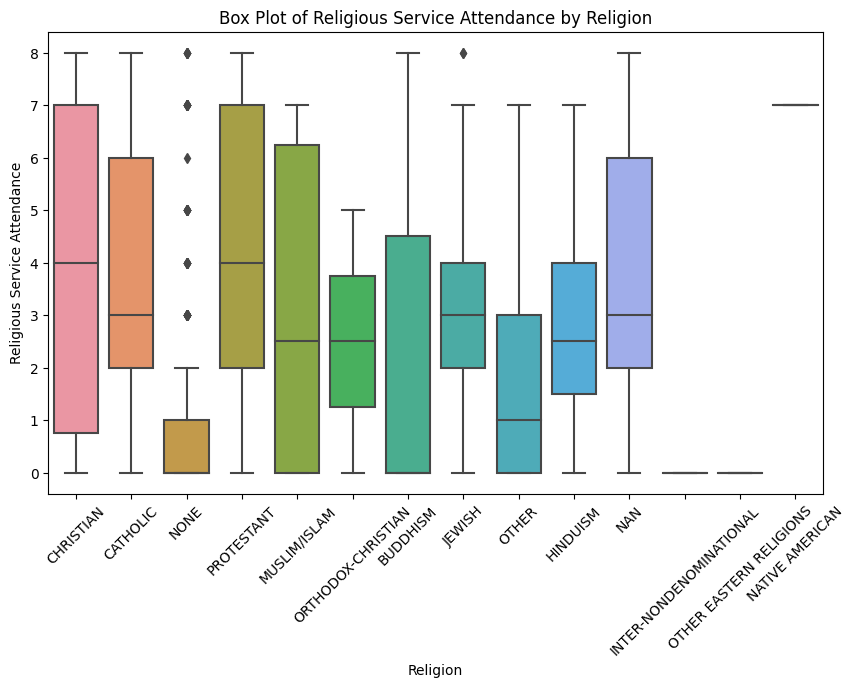

In [ ]:
# Creating a Box Plot for Religious Service Attendance by Religion
plt.figure(figsize=(10, 6))
sns.boxplot(x='RELIG', y='ATTEND', data=df)
plt.xlabel('Religion')
plt.ylabel('Religious Service Attendance')
plt.title('Box Plot of Religious Service Attendance by Religion')
plt.xticks(rotation=45)
plt.show()

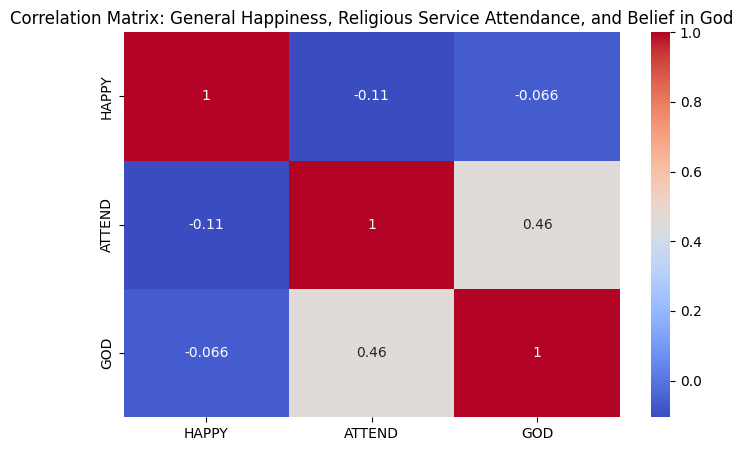

In [ ]:
# Selecting a subset of variables for the correlation matrix
selected_vars = ['HAPPY', 'ATTEND', 'GOD']
correlation_matrix_subset = df[selected_vars].corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix_subset, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix: General Happiness, Religious Service Attendance, and Belief in God')
plt.show()

**Conclusion**

**Appendix**